In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
col_names = ["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids",
             "Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines",
             "Proline"]

In [3]:
df = pd.read_csv("./wine.data", names=col_names)
df.shape

(178, 14)

In [4]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
rows_train = np.int(df.shape[0]*0.7)
rows_test = np.int(df.shape[0]*0.3)
print("Datos para train: ", rows_train)
print("Datos para test: ", rows_test)

Datos para train:  124
Datos para test:  53


In [6]:
from sklearn.model_selection import train_test_split
y = df["Class"]
X = df.drop("Class", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((124, 13), (124,), (54, 13), (54,))

In [44]:
def k_validation(X_train, y_train, X_test, y_test, k_i, k_f, p=2):
    """
    Función para validar el mejor "K", número de vecinos para el knn.
    X_train: datos de entrenamiento
    y_train: labels de entrenamiento
    X_test: datos de prueba
    y_test: labels de prueba
    
    return: matrix, donde cada fila es el resultado de un "k" dado y la columna 1
    es el score en train y la columna dos es el score en test.
    """
    
    from sklearn.neighbors import KNeighborsClassifier
    n_cols = 3
    result = np.zeros((k_f-k_i + 1, n_cols))
    idx = 0
    for i in range(k_i, k_f+1):
        knn = KNeighborsClassifier(p=p,n_jobs=3, n_neighbors=i)
        knn.fit(X_train, y_train)
        score_train = knn.score(X_train, y_train)
        score_test = knn.score(X_test, y_test)
        
        result[idx,0] = i #el valor de k
        result[idx,1] = score_train
        result[idx,2] = score_test
        idx+=1
            
    return result

In [45]:
score = k_validation(X_train, y_train, X_test, y_test,2,20, p=2)

In [46]:
score

array([[ 2.        ,  0.87096774,  0.68518519],
       [ 3.        ,  0.84677419,  0.72222222],
       [ 4.        ,  0.79032258,  0.7037037 ],
       [ 5.        ,  0.76612903,  0.77777778],
       [ 6.        ,  0.7983871 ,  0.74074074],
       [ 7.        ,  0.77419355,  0.7037037 ],
       [ 8.        ,  0.7983871 ,  0.64814815],
       [ 9.        ,  0.78225806,  0.68518519],
       [10.        ,  0.78225806,  0.68518519],
       [11.        ,  0.75      ,  0.72222222],
       [12.        ,  0.71774194,  0.74074074],
       [13.        ,  0.7016129 ,  0.72222222],
       [14.        ,  0.73387097,  0.66666667],
       [15.        ,  0.72580645,  0.72222222],
       [16.        ,  0.71774194,  0.7037037 ],
       [17.        ,  0.75      ,  0.7037037 ],
       [18.        ,  0.72580645,  0.7037037 ],
       [19.        ,  0.75      ,  0.74074074],
       [20.        ,  0.72580645,  0.7037037 ]])

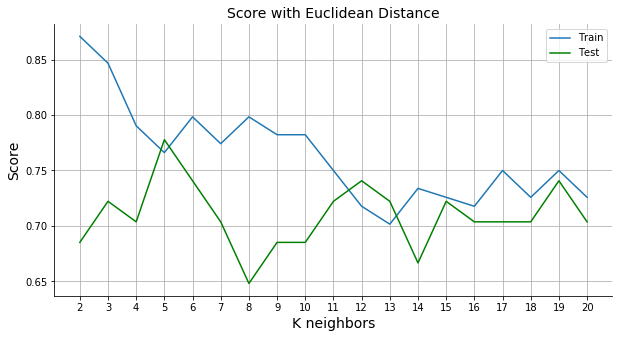

In [47]:
ax = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Score with Euclidean Distance", size=14)
plt.xlabel("K neighbors", size=14)
plt.ylabel("Score", size=14)
plt.xticks(score[:,0])
plt.plot(score[:,0],score[:,1], label="Train")
plt.plot(score[:,0],score[:,2], label="Test", color="green")
plt.grid()
plt.legend();

In [48]:
score = k_validation(X_train, y_train, X_test, y_test,2,20, p=1)
score

array([[ 2.        ,  0.91935484,  0.72222222],
       [ 3.        ,  0.87096774,  0.77777778],
       [ 4.        ,  0.86290323,  0.74074074],
       [ 5.        ,  0.80645161,  0.7962963 ],
       [ 6.        ,  0.77419355,  0.77777778],
       [ 7.        ,  0.79032258,  0.74074074],
       [ 8.        ,  0.79032258,  0.75925926],
       [ 9.        ,  0.81451613,  0.81481481],
       [10.        ,  0.79032258,  0.77777778],
       [11.        ,  0.81451613,  0.74074074],
       [12.        ,  0.79032258,  0.74074074],
       [13.        ,  0.77419355,  0.72222222],
       [14.        ,  0.78225806,  0.75925926],
       [15.        ,  0.78225806,  0.7962963 ],
       [16.        ,  0.79032258,  0.72222222],
       [17.        ,  0.78225806,  0.77777778],
       [18.        ,  0.76612903,  0.72222222],
       [19.        ,  0.75806452,  0.77777778],
       [20.        ,  0.75806452,  0.74074074]])

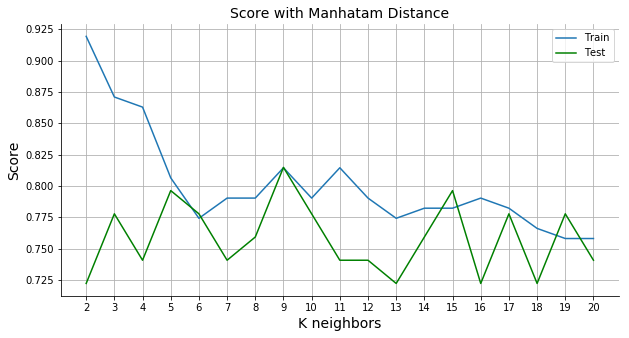

In [49]:
ax = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Score with Manhatam Distance", size=14)
plt.xlabel("K neighbors", size=14)
plt.ylabel("Score", size=14)
plt.xticks(score[:,0])
plt.plot(score[:,0],score[:,1], label="Train")
plt.plot(score[:,0],score[:,2], label="Test", color="green")
plt.grid()
plt.legend();